In [76]:
# Import Libraries & Load FEMA Dataset
import pandas as pd
import numpy as np

df = pd.read_csv("FemaWebDisasterDeclarations.csv")
df.head()

,disasterNumber,declarationDate,disasterName,incidentBeginDate,incidentEndDate,declarationType,stateCode,stateName,incidentType,entryDate,...,hmProgramDeclared,designatedIncidentTypes,declarationRequestDate,disasterPageUrl,shapefileUrl,kmzfileUrl,geoJsonUrl,id,hash,lastRefresh
0,5243,2018-06-22T00:00:00.000Z,GRAHAM FIRE,2018-06-21T00:00:00.000Z,2018-06-25T00:00:00.000Z,Fire Management,OR,Oregon,Fire,2018-06-22T00:00:00.000Z,...,1.0,NaN,2018-06-21T00:00:00.000Z,https://www.fema.gov/disaster/5243,NaN,NaN,NaN,900e65d9-8a7f-4217-966a-e108987bb771,08382f229bcafca49c0ed61df2ef7319df8e0751,2025-03-13T14:21:43.977Z
1,5554,2025-03-07T00:00:00.000Z,COVINGTON DRIVE FIRE,2025-03-01T00:00:00.000Z,NaN,Fire Management,SC,South Carolina,Fire,2025-03-10T00:00:00.000Z,...,1.0,R,2025-03-07T00:00:00.000Z,https://www.fema.gov/disaster/5554,NaN,NaN,NaN,1563fa43-ddd2-4582-be3e-94f79f6d6ff3,b1fc5f2ab0c8b8196b5f4b14b5227e4a1e6108bc,2025-03-11T19:21:45.366Z
2,4859,2025-01-15T00:00:00.000Z,SEVERE STORM AND FLOODING,2024-10-20T00:00:00.000Z,2024-10-23T00:00:00.000Z,Major Disaster,AK,Alaska,Severe Storm,2025-01-16T00:00:00.000Z,...,1.0,"5,W",2024-12-16T00:00:00.000Z,https://www.fema.gov/disaster/4859,https://gis.fema.gov/maps/dec_4859.zip,https://gis.fema.gov/maps/dec_4859.kmz,https://gis.fema.gov/geoserver/FEMA/ows?servic...,4f60e479-1ef9-468c-a840-0d3b009f519a,ee03fbcec2238993a17bd6a7cef283b0b85c0ec7,2025-03-11T19:21:45.366Z
3,4856,2025-01-08T00:00:00.000Z,WILDFIRES AND STRAIGHT-LINE WINDS,2025-01-07T00:00:00.000Z,2025-01-31T00:00:00.000Z,Major Disaster,CA,California,Fire,2025-01-09T00:00:00.000Z,...,1.0,"2,R",2025-01-08T00:00:00.000Z,https://www.fema.gov/disaster/4856,https://gis.fema.gov/maps/dec_4856.zip,https://gis.fema.gov/maps/dec_4856.kmz,https://gis.fema.gov/geoserver/FEMA/ows?servic...,ee718fce-7188-4043-bde7-978e2fbb0ba9,2f558f231382992df3e58041355399476edf8468,2025-03-11T19:21:45.366Z
4,5551,2025-01-08T00:00:00.000Z,HURST FIRE,2025-01-07T00:00:00.000Z,NaN,Fire Management,CA,California,Fire,2025-01-08T00:00:00.000Z,...,1.0,R,2025-01-08T00:00:00.000Z,https://www.fema.gov/disaster/5551,NaN,NaN,NaN,57d63321-ba14-4c4d-80cb-b9e71448ee5f,d424d770d9044d5f640c36ae66620c932c1d06bf,2025-03-11T19:21:45.366Z


In [77]:
df.shape

(5139, 26)

In [78]:
df.columns

Index(['disasterNumber', 'declarationDate', 'disasterName',
       'incidentBeginDate', 'incidentEndDate', 'declarationType', 'stateCode',
       'stateName', 'incidentType', 'entryDate', 'updateDate', 'closeoutDate',
       'region', 'ihProgramDeclared', 'iaProgramDeclared', 'paProgramDeclared',
       'hmProgramDeclared', 'designatedIncidentTypes',
       'declarationRequestDate', 'disasterPageUrl', 'shapefileUrl',
       'kmzfileUrl', 'geoJsonUrl', 'id', 'hash', 'lastRefresh'],
      dtype='object')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5139 entries, 0 to 5138
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   disasterNumber           5139 non-null   int64  
 1   declarationDate          5139 non-null   object 
 2   disasterName             5139 non-null   object 
 3   incidentBeginDate        5139 non-null   object 
 4   incidentEndDate          4836 non-null   object 
 5   declarationType          5139 non-null   object 
 6   stateCode                5139 non-null   object 
 7   stateName                5139 non-null   object 
 8   incidentType             5139 non-null   object 
 9   entryDate                5139 non-null   object 
 10  updateDate               5139 non-null   object 
 11  closeoutDate             4091 non-null   object 
 12  region                   5139 non-null   int64  
 13  ihProgramDeclared        4888 non-null   float64
 14  iaProgramDeclared       

In [80]:
# Check missing values
df.isna().sum()

disasterNumber                0
declarationDate               0
disasterName                  0
incidentBeginDate             0
incidentEndDate             303
declarationType               0
stateCode                     0
stateName                     0
incidentType                  0
entryDate                     0
updateDate                    0
closeoutDate               1048
region                        0
ihProgramDeclared           251
iaProgramDeclared           251
paProgramDeclared           251
hmProgramDeclared           251
designatedIncidentTypes    3672
declarationRequestDate        1
disasterPageUrl               0
shapefileUrl               3917
kmzfileUrl                 3917
geoJsonUrl                 3917
id                            0
hash                          0
lastRefresh                   0
dtype: int64

In [81]:
# View unique values in key categorical columns
df['incidentType'].value_counts(dropna=False).head(20)

incidentType
Fire                1719
Severe Storm        1127
Flood                915
Hurricane            453
Tornado              182
Snowstorm            171
Biological           167
Severe Ice Storm      75
Typhoon               63
Drought               46
Earthquake            36
Tropical Storm        35
Other                 34
Coastal Storm         31
Freezing              18
Winter Storm          15
Mud/Landslide         13
Toxic Substances       8
Dam/Levee Break        6
Fishing Losses         6
Name: count, dtype: int64

In [82]:
# Convert Date Columns to Datetime
date_cols = [
    'declarationDate',
    'incidentBeginDate',
    'incidentEndDate'
]

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

In [83]:
df[date_cols].head()

,declarationDate,incidentBeginDate,incidentEndDate
0,2018-06-22 00:00:00+00:00,2018-06-21 00:00:00+00:00,2018-06-25 00:00:00+00:00
1,2025-03-07 00:00:00+00:00,2025-03-01 00:00:00+00:00,NaT
2,2025-01-15 00:00:00+00:00,2024-10-20 00:00:00+00:00,2024-10-23 00:00:00+00:00
3,2025-01-08 00:00:00+00:00,2025-01-07 00:00:00+00:00,2025-01-31 00:00:00+00:00
4,2025-01-08 00:00:00+00:00,2025-01-07 00:00:00+00:00,NaT


In [84]:
# Remove duplicate rows (if any)
df = df.drop_duplicates()

In [85]:
# Drop rows missing critical identifiers
critical_cols = ['disasterNumber', 'state', 'incidentType']

df = df.dropna(subset=[c for c in critical_cols if c in df.columns])

In [86]:
# Fill Missing Program Flags (if present)
program_cols = [
    'ihProgramDeclared',
    'paProgramDeclared',
    'hmProgramDeclared'
]

for col in program_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0).astype(int)

In [87]:
# Standardize "incidentType"
df['incidentType'] = (
    df['incidentType']
    .str.strip()
    .str.upper()
)

In [88]:
# Group similar labels
replacement_map = {
    'HURRICANE (TYPHOON)': 'HURRICANE',
    'SEVERE STORM(S)': 'SEVERE STORM',
    'TORNADOES, TROPICAL STORM, FLOODING': 'SEVERE STORM',
    'FLOODING': 'FLOOD'
}

df['incidentType'] = df['incidentType'].replace(replacement_map)

In [89]:
df['incidentType'].value_counts().head(15)

incidentType
FIRE                1719
SEVERE STORM        1127
FLOOD                915
HURRICANE            453
TORNADO              182
SNOWSTORM            171
BIOLOGICAL           167
SEVERE ICE STORM      75
TYPHOON               63
DROUGHT               46
EARTHQUAKE            36
TROPICAL STORM        35
OTHER                 34
COASTAL STORM         31
FREEZING              18
Name: count, dtype: int64

In [90]:
# Save Cleaned Dataset
df.to_csv("FEMA_cleaned_milestone1.csv", index=False)

In [91]:
# Create a Year Column from Incident or Declaration Date
if 'incidentBeginDate' in df.columns:
    df['year'] = df['incidentBeginDate'].dt.year
elif 'declarationDate' in df.columns:
    df['year'] = df['declarationDate'].dt.year

In [92]:
df['year'].value_counts().sort_index().head(10)

year
1953    13
1954    17
1955    18
1956    16
1957    16
1958     7
1959     7
1960    12
1961    12
1962    22
Name: count, dtype: int64

In [93]:
# Summary Statistics (Basic EDA)
print("Total Records:", len(df))
print("Unique Disasters:", df['disasterNumber'].nunique())

print("\nTop Incident Types:")
print(df['incidentType'].value_counts().head(10))

if 'state' in df.columns:
    print("\nTop States:")
    print(df['state'].value_counts().head(10))

Total Records: 5139
Unique Disasters: 5139

Top Incident Types:
incidentType
FIRE                1719
SEVERE STORM        1127
FLOOD                915
HURRICANE            453
TORNADO              182
SNOWSTORM            171
BIOLOGICAL           167
SEVERE ICE STORM      75
TYPHOON               63
DROUGHT               46
Name: count, dtype: int64


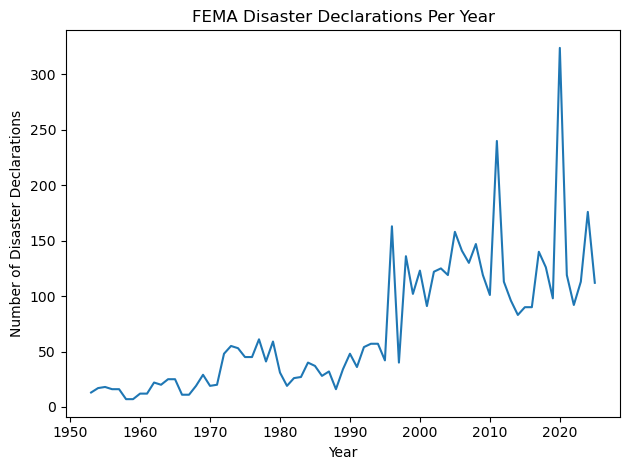

In [94]:
# Declarations Per Year (Time-Series Plot)
import matplotlib.pyplot as plt

declarations_per_year = (
    df.groupby('year')
      .size()
      .reset_index(name='count')
      .sort_values('year')
)

plt.figure()
plt.plot(declarations_per_year['year'], declarations_per_year['count'])
plt.xlabel("Year")
plt.ylabel("Number of Disaster Declarations")
plt.title("FEMA Disaster Declarations Per Year")
plt.tight_layout()
plt.show()

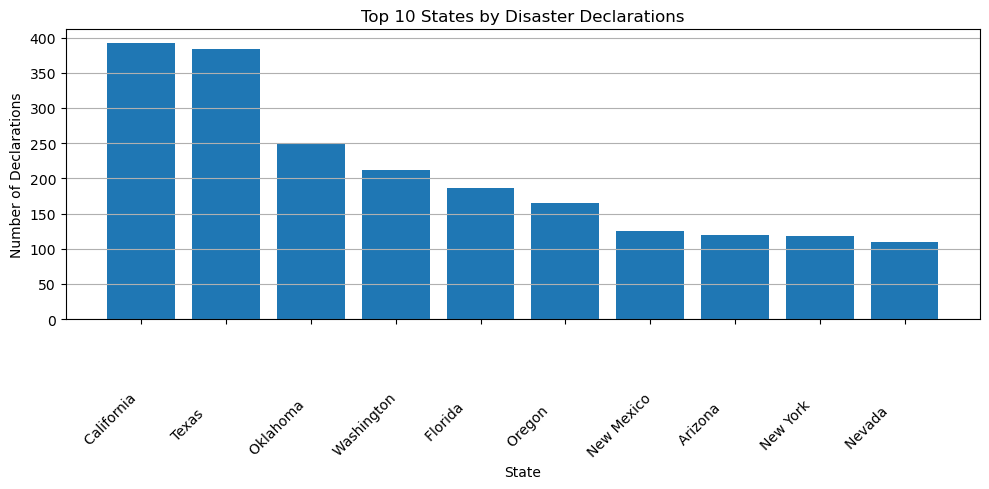

In [95]:
# Declarations Per State (Bar Chart)
top_states = declarations_per_state.head(10)

plt.figure(figsize=(10,5))

plt.bar(
    top_states[group_col],
    top_states['count']
)

plt.title("Top 10 States by Disaster Declarations")
plt.xlabel("State")
plt.ylabel("Number of Declarations")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()
